**THEORY QUESTIONS**

1. Can we use Bagging for regression problems?

Yes, Bagging can be used for regression problems. In Bagging Regression, multiple regression models are trained on different bootstrap samples of the dataset. The final prediction is obtained by averaging the predictions of all models. This reduces variance and improves prediction stability, especially for high-variance models like Decision Trees.

2. What is the difference between multiple model training and single model training?

Single model training involves training one model on the entire dataset, which may suffer from overfitting or high variance. Multiple model training involves training several models and combining their predictions, which improves generalization, reduces variance, and increases robustness.

3. Explain the concept of feature randomness in Random Forest

In Random Forest, feature randomness means that at each split in a tree, only a random subset of features is considered. This reduces correlation between trees and ensures diversity in the ensemble, which improves overall performance.

4. What is OOB (Out-of-Bag) Score?

Out-of-Bag (OOB) Score is an internal validation method in Random Forest and Bagging. Since each tree is trained on a bootstrap sample, some data points are left out. These unused samples are used to test the model, providing an unbiased estimate of performance without a separate validation set.

5. How can you measure the importance of features in a Random Forest model?

Feature importance in Random Forest is measured by calculating how much each feature decreases impurity across all trees. Features that contribute more to reducing impurity are assigned higher importance scores.

6. Explain the working principle of a Bagging Classifier

A Bagging Classifier works by creating multiple bootstrap samples from the dataset and training a base classifier on each sample. Predictions from all classifiers are combined using majority voting to produce the final output.

7. How do you evaluate a Bagging Classifier’s performance?

Performance is evaluated using metrics such as accuracy, precision, recall, F1-score, ROC-AUC score, cross-validation, and OOB score if available.

8. How does a Bagging Regressor work?

A Bagging Regressor trains multiple regression models on different bootstrap samples. The final prediction is the average of predictions from all regressors, which reduces variance.

9. What is the main advantage of ensemble techniques?

The main advantage of ensemble techniques is improved predictive performance and robustness by combining multiple models instead of relying on a single model.

10. What is the main challenge of ensemble methods?

The main challenge is increased computational cost, complexity, and reduced interpretability compared to single models.

11. Explain the key idea behind ensemble techniques

The key idea is that combining multiple weak or diverse models leads to a stronger and more accurate overall model.

12. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble learning algorithm that builds multiple Decision Trees using bagging and feature randomness and combines their predictions using majority voting.

13. What are the main types of ensemble techniques?

The main types are Bagging, Boosting, and Stacking.

14. What is ensemble learning in machine learning?

Ensemble learning is a technique where multiple models are trained and combined to solve a problem more accurately than a single model.

15. When should we avoid using ensemble methods?

Ensemble methods should be avoided when computational resources are limited, model interpretability is crucial, or the dataset is very small.

16. How does Bagging help in reducing overfitting?

Bagging reduces overfitting by averaging predictions from multiple models trained on different data samples, which reduces variance.

17. Why is Random Forest better than a single Decision Tree?

Random Forest reduces overfitting, improves accuracy, and is more robust to noise compared to a single Decision Tree.

18. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling creates multiple training datasets with replacement, ensuring diversity among models.

19. What are some real-world applications of ensemble techniques?

Applications include fraud detection, medical diagnosis, recommendation systems, stock market prediction, and image classification.

20. What is the difference between Bagging and Boosting?

Bagging trains models independently to reduce variance, while Boosting trains models sequentially, focusing on correcting previous errors to reduce bias.

**PRACTICAL**

In [4]:
#21
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 1.0


In [5]:
#22
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 2987.0073593984966


In [6]:
#23
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X, y)

for name, importance in zip(data.feature_names, rf.feature_importances_):
    print(name, ":", importance)


mean radius : 0.034843233980943286
mean texture : 0.015225145712914773
mean perimeter : 0.06799034063826767
mean area : 0.0604616365111208
mean smoothness : 0.0079584528113981
mean compactness : 0.0115970382551153
mean concavity : 0.06691736463414073
mean concave points : 0.10704565721708294
mean symmetry : 0.0034227883667066654
mean fractal dimension : 0.002615076161734035
radius error : 0.014263704023561991
texture error : 0.003744265527721131
perimeter error : 0.010085060356218195
area error : 0.029552828963121246
smoothness error : 0.0047215698751171715
compactness error : 0.0056118342607874684
concavity error : 0.005819693803295157
concave points error : 0.0037597476696419278
symmetry error : 0.003545970882211007
fractal dimension error : 0.005942332118800315
worst radius : 0.08284828183729644
worst texture : 0.017485260960677165
worst perimeter : 0.08084969717184524
worst area : 0.13935694286788813
worst smoothness : 0.012232023199117627
worst compactness : 0.01986385650955019
wo

In [7]:
#24
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Decision Tree MSE:", mean_squared_error(y_test, dt.predict(X_test)))
print("Random Forest MSE:", mean_squared_error(y_test, rf.predict(X_test)))


Decision Tree MSE: 5697.789473684211
Random Forest MSE: 2859.641982706767


In [8]:
#25
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

rf_oob.fit(X_train, y_train)

print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.006472491909385114


In [32]:
#26
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train Bagging Classifier with SVM
model = BaggingClassifier(
    estimator=SVC(kernel='rbf', probability=True),
    n_estimators=10,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9181286549707602


In [10]:
#27
for n in [10, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Trees: {n}, Accuracy: {acc}")


Trees: 10, Accuracy: 0.0
Trees: 50, Accuracy: 0.007518796992481203
Trees: 100, Accuracy: 0.007518796992481203


In [31]:
#28
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train Bagging Classifier with Logistic Regression
model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=2000),
    n_estimators=20,
    random_state=42
)

model.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc_score)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.9932827102803738


In [12]:
#29
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

misclassified = X_test[y_test != y_pred]
print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 132


In [13]:
#30
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 0.022556390977443608
Bagging Accuracy: 0.0


In [14]:
#31
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf.predict(X_test))
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
#32
from sklearn.metrics import classification_report

print(classification_report(y_test, bag.predict(X_test)))


              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        39.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00      0.00      0.00       0.0
        44.0       0.00      0.00      0.00       0.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       3.0
        53.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       0.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       1.0
        60.0       0.00      0.00      0.00       2.0
        61.0       0.00      0.00      0.00       2.0
        63.0       0.00      0.00      0.00       3.0
        64.0       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [16]:
#33
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.9543859649122808


In [17]:
#34
for depth in [2, 5, 10]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Max Depth: {depth}, Accuracy: {acc}")


Max Depth: 2, Accuracy: 0.0
Max Depth: 5, Accuracy: 0.007518796992481203
Max Depth: 10, Accuracy: 0.0


In [18]:
#35
from sklearn.neighbors import KNeighborsRegressor

bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)

bag_dt.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

print("DT Bagging MSE:", mean_squared_error(y_test, bag_dt.predict(X_test)))
print("KNN Bagging MSE:", mean_squared_error(y_test, bag_knn.predict(X_test)))


DT Bagging MSE: 2987.0073593984966
KNN Bagging MSE: 3140.186131007519


In [19]:
#36
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=2000))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9707602339181286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#37
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]

print("Top 5 Important Features:")
for i in indices:
    print(data.feature_names[i], ":", importances[i])


Top 5 Important Features:
worst perimeter : 0.08084969717184524
worst radius : 0.08284828183729644
mean concave points : 0.10704565721708294
worst concave points : 0.13222508566399135
worst area : 0.13935694286788813


In [21]:
#38
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [23]:
#39
for depth in [2, 5, 10, None]:
    rf = RandomForestClassifier(
        max_depth=depth,
        n_estimators=100,
        random_state=42
    )
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print("Max Depth:", depth, "Accuracy:", acc)



Max Depth: 2 Accuracy: 0.0
Max Depth: 5 Accuracy: 0.007518796992481203
Max Depth: 10 Accuracy: 0.0
Max Depth: None Accuracy: 0.007518796992481203


In [22]:
#40
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)

bag_dt.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

print("Decision Tree Bagging MSE:",
      mean_squared_error(y_test, bag_dt.predict(X_test)))

print("KNN Bagging MSE:",
      mean_squared_error(y_test, bag_knn.predict(X_test)))


Decision Tree Bagging MSE: 2987.0073593984966
KNN Bagging MSE: 3140.186131007519


In [30]:
#41
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load a binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.991311331775701


In [25]:
#42
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

scores = cross_val_score(bag, X, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.009065372829417773


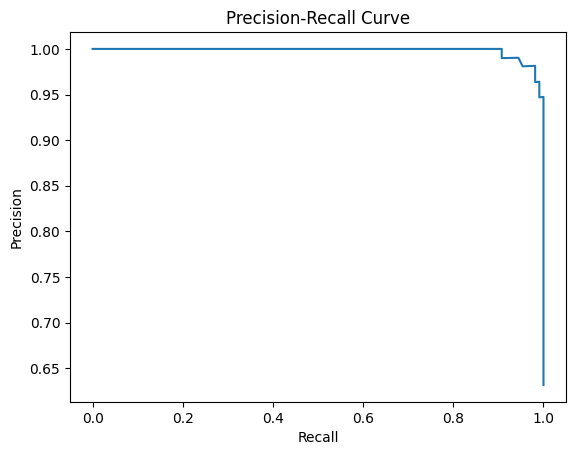

In [29]:
#43
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load binary dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [27]:
#44
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=2000))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print("Stacking (RF + LR) Accuracy:",
      accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (164) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking (RF + LR) Accuracy: 0.007518796992481203


In [28]:
#45
for bootstrap in [True, False]:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        bootstrap=bootstrap,
        random_state=42
    )
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print("Bootstrap:", bootstrap, "MSE:", mse)


Bootstrap: True MSE: 2987.0073593984966
Bootstrap: False MSE: 5190.679618045113
